In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
UK_POPN_SIZE_2020 = 66647112
TIER_INTRO_DATE = "2020-06-15"

In [3]:
ECDC_GBL_DAILY_CASE_DEATH_2020_CLEAN = 'data/ecdc/clean/ecdc_daily_worldwide_cases_2020_12_14.csv'

In [4]:
ECDC_GBL_DAILY_CASE_DEATH_2020 = "data/ecdc/ecdc_daily_worldwide_cases_2020_12_14.csv"

GOV_UK_DAILY_CASE_LTLA = "data/gov_uk/gov_uk_ltla_newCasesBySpecimenDate_2021-05-09.csv"

ICL_NPIS = "data/icl/npis_23Mar_02Dec.csv"


ICL_NPIS_CLEAN = "data/icl/clean/npis_23Mar_02Dec.csv"
GOV_UK_DAILY_CASE_LTLA_TIER_CLEAN = "data/gov_uk_icl/clean/gov_uk_ltla_tier_newCasesBySpecimenDate_2021-05-09.csv"

In [5]:
ecdc_gbl_case_death_2020_df = pd.read_csv(ECDC_GBL_DAILY_CASE_DEATH_2020)
ecdc_gbl_case_death_2020_df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


**What are the date ranges?**

Dec 31 2019 - Dec 14 2020.  This is as expected.

In [6]:
ecdc_gbl_case_death_2020_df.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [7]:
# We want to format string to datetime.  Check if there are any zero padding.
ecdc_gbl_case_death_2020_df["dateRep"].unique()

array(['14/12/2020', '13/12/2020', '12/12/2020', '11/12/2020',
       '10/12/2020', '09/12/2020', '08/12/2020', '07/12/2020',
       '06/12/2020', '05/12/2020', '04/12/2020', '03/12/2020',
       '02/12/2020', '01/12/2020', '30/11/2020', '29/11/2020',
       '28/11/2020', '27/11/2020', '26/11/2020', '25/11/2020',
       '24/11/2020', '23/11/2020', '22/11/2020', '21/11/2020',
       '20/11/2020', '19/11/2020', '18/11/2020', '17/11/2020',
       '16/11/2020', '15/11/2020', '14/11/2020', '13/11/2020',
       '12/11/2020', '11/11/2020', '10/11/2020', '09/11/2020',
       '08/11/2020', '07/11/2020', '06/11/2020', '05/11/2020',
       '04/11/2020', '03/11/2020', '02/11/2020', '01/11/2020',
       '31/10/2020', '30/10/2020', '29/10/2020', '28/10/2020',
       '27/10/2020', '26/10/2020', '25/10/2020', '24/10/2020',
       '23/10/2020', '22/10/2020', '21/10/2020', '20/10/2020',
       '19/10/2020', '18/10/2020', '17/10/2020', '16/10/2020',
       '15/10/2020', '14/10/2020', '13/10/2020', '12/10

In [8]:
ecdc_gbl_case_death_2020_df["dateRep"] = pd.to_datetime(ecdc_gbl_case_death_2020_df["dateRep"], format="%d/%m/%Y")

In [9]:
ecdc_gbl_case_death_2020_df["dateRep"].min()

Timestamp('2019-12-31 00:00:00')

In [10]:
ecdc_gbl_case_death_2020_df["dateRep"].max()

Timestamp('2020-12-14 00:00:00')

**What are the date ranges for the UK?**

Dec 31 2019 - Dec 14 2021


In [11]:
ecdc_gbl_case_death_2020_df["countriesAndTerritories"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri

In [12]:
ecdc_gbl_case_death_2020_df[ecdc_gbl_case_death_2020_df["countriesAndTerritories"] == "United_Kingdom"]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
58378,2020-12-14,14,12,2020,18447,144,United_Kingdom,UK,GBR,66647112.0,Europe,348.216139
58379,2020-12-13,13,12,2020,21501,520,United_Kingdom,UK,GBR,66647112.0,Europe,338.775370
58380,2020-12-12,12,12,2020,21672,424,United_Kingdom,UK,GBR,66647112.0,Europe,330.327892
58381,2020-12-11,11,12,2020,20964,516,United_Kingdom,UK,GBR,66647112.0,Europe,319.925341
58382,2020-12-10,10,12,2020,16578,533,United_Kingdom,UK,GBR,66647112.0,Europe,314.810340
...,...,...,...,...,...,...,...,...,...,...,...,...
58723,2020-01-04,4,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
58724,2020-01-03,3,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
58725,2020-01-02,2,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN
58726,2020-01-01,1,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,NaN


In [13]:
ecdc_gbl_case_death_2020_df[ecdc_gbl_case_death_2020_df["countriesAndTerritories"] == "United_Kingdom"]["dateRep"].min()

Timestamp('2019-12-31 00:00:00')

In [14]:
ecdc_gbl_case_death_2020_df[ecdc_gbl_case_death_2020_df["countriesAndTerritories"] == "United_Kingdom"]["dateRep"].max()

Timestamp('2020-12-14 00:00:00')

In [15]:
ecdc_gbl_case_death_2020_df["iso_week"] = ecdc_gbl_case_death_2020_df["dateRep"].dt.isocalendar()["week"]
ecdc_gbl_case_death_2020_df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,iso_week
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,51
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,50
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,50
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,50
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,13
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,13
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,13
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN,12


In [16]:
ecdc_gbl_case_death_2020_uk_df = ecdc_gbl_case_death_2020_df[ecdc_gbl_case_death_2020_df["countriesAndTerritories"] == "United_Kingdom"].copy()
ecdc_gbl_case_death_2020_uk_df = ecdc_gbl_case_death_2020_uk_df.sort_values("dateRep", ascending=True)
ecdc_gbl_case_death_2020_uk_df = ecdc_gbl_case_death_2020_uk_df.rolling(window='7D', 
                                                                        on="dateRep",
                                                                        min_periods=7)["cases", "deaths"].sum()
ecdc_gbl_case_death_2020_uk_df["cases_per_100k"] = ecdc_gbl_case_death_2020_uk_df["cases"] * 1e5 / UK_POPN_SIZE_2020
ecdc_gbl_case_death_2020_uk_df["deaths_per_1m"] = ecdc_gbl_case_death_2020_uk_df["deaths"] * 1e6 / UK_POPN_SIZE_2020
ecdc_gbl_case_death_2020_uk_df

,cases,deaths,dateRep,cases_per_100k,deaths_per_1m
58727,NaN,NaN,2019-12-31,NaN,NaN
58726,NaN,NaN,2020-01-01,NaN,NaN
58725,NaN,NaN,2020-01-02,NaN,NaN
58724,NaN,NaN,2020-01-03,NaN,NaN
58723,NaN,NaN,2020-01-04,NaN,NaN
...,...,...,...,...,...
58382,107563.0,2867.0,2020-12-10,161.391839,43.017618
58381,113649.0,2969.0,2020-12-11,170.523518,44.548067
58380,119023.0,2889.0,2020-12-12,178.586883,43.347715
58379,124985.0,3012.0,2020-12-13,187.532507,45.193256


In [17]:
ecdc_gbl_case_death_2020_uk_df[~ecdc_gbl_case_death_2020_uk_df["cases"].isna() &
                               (ecdc_gbl_case_death_2020_uk_df["cases"] != 0)]

,cases,deaths,dateRep,cases_per_100k,deaths_per_1m
58695,2.0,0.0,2020-02-01,0.003001,0.000000
58694,2.0,0.0,2020-02-02,0.003001,0.000000
58693,2.0,0.0,2020-02-03,0.003001,0.000000
58692,2.0,0.0,2020-02-04,0.003001,0.000000
58691,3.0,0.0,2020-02-05,0.004501,0.000000
...,...,...,...,...,...
58382,107563.0,2867.0,2020-12-10,161.391839,43.017618
58381,113649.0,2969.0,2020-12-11,170.523518,44.548067
58380,119023.0,2889.0,2020-12-12,178.586883,43.347715
58379,124985.0,3012.0,2020-12-13,187.532507,45.193256


In [18]:
ecdc_gbl_case_death_2020_uk_df.describe()

,cases,deaths,cases_per_100k,deaths_per_1m
count,344.000000,344.000000,344.000000,344.000000
mean,36432.026163,1281.444767,54.664073,19.227311
std,51399.596139,1726.010102,77.122016,25.897748
min,0.000000,0.000000,0.000000,0.000000
25%,4141.750000,68.000000,6.214448,1.020299
50%,10147.000000,353.000000,15.224966,5.296554
75%,33246.500000,2252.750000,49.884382,33.801165
max,177318.000000,6597.000000,266.055039,98.984034


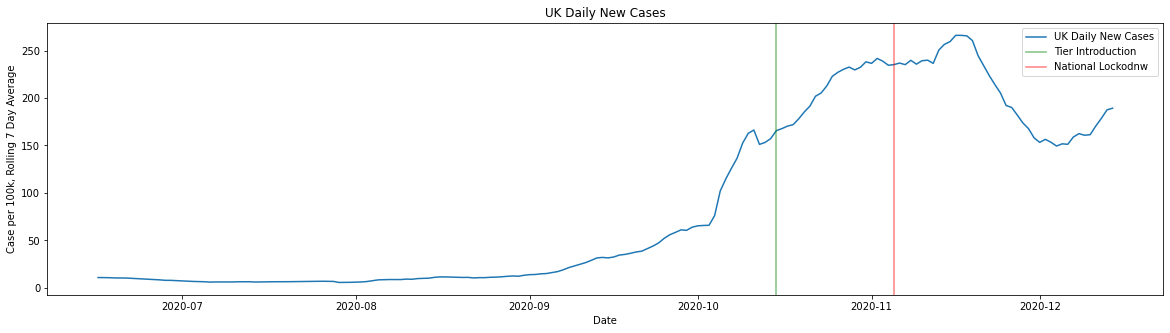

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.plot(ecdc_gbl_case_death_2020_uk_df[ecdc_gbl_case_death_2020_uk_df["dateRep"] > TIER_INTRO_DATE]["dateRep"], 
        ecdc_gbl_case_death_2020_uk_df[ecdc_gbl_case_death_2020_uk_df["dateRep"] > TIER_INTRO_DATE]["cases_per_100k"],
       label="UK Daily New Cases")
ax.axvline("2020-10-15", color = "green", alpha=0.5, label="Tier Introduction")
ax.axvline("2020-11-05", color = "red", alpha=0.5, label="National Lockodnw")
ax.set_ylabel("Case per 100k, Rolling 7 Day Average")
ax.set_xlabel("Date")
ax.set_title("UK Daily New Cases")
ax.legend()
plt.show()

In [20]:
ecdc_gbl_case_death_2020_uk_df.to_csv(ECDC_GBL_DAILY_CASE_DEATH_2020_CLEAN, index=False, header=True)

In [21]:
! ls -lht {ECDC_GBL_DAILY_CASE_DEATH_2020_CLEAN}

-rw-r--r--  1 tn6  937    19K 10 May 23:41 data/ecdc/clean/ecdc_daily_worldwide_cases_2020_12_14.csv


In [22]:
! wc -l {ECDC_GBL_DAILY_CASE_DEATH_2020_CLEAN}

     351 data/ecdc/clean/ecdc_daily_worldwide_cases_2020_12_14.csv


In [23]:
! head {ECDC_GBL_DAILY_CASE_DEATH_2020_CLEAN}

cases,deaths,dateRep,cases_per_100k,deaths_per_1m
,,2019-12-31,,
,,2020-01-01,,
,,2020-01-02,,
,,2020-01-03,,
,,2020-01-04,,
,,2020-01-05,,
0.0,0.0,2020-01-06,0.0,0.0
0.0,0.0,2020-01-07,0.0,0.0
0.0,0.0,2020-01-08,0.0,0.0


# Clean Imperial Collage Curated Dataset of Tiered Interventions in UK Local Authorities

In [24]:
icl_npis_df = pd.read_csv(ICL_NPIS)
icl_npis_df

,date,ltla,limited_to_groups_of_6_indoors,limited_to_groups_of_6_outdoors,curfew_of_10pm_for_hospitality_venues,instruction_to_work_from_home_where_possible,travel_discouraged,no_indoor_mixing,overnight_stays_discouraged,residents_cannot_leave_the_local_area,...,tier_2_nested,tier_1_nested,Tier,tier_1_BD_nested,tier_2_BD_nested,tier_3_BD_nested,Tier_BD,tier_1_BD,tier_2_BD,tier_3_BD
0,23/03/2020,Adur,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
1,24/03/2020,Adur,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
2,25/03/2020,Adur,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
3,26/03/2020,Adur,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
4,27/03/2020,Adur,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80320,28/11/2020,York,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
80321,29/11/2020,York,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
80322,30/11/2020,York,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1
80323,01/12/2020,York,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,3,0,0,1


In [25]:
icl_npis_df.columns

Index(['date', 'ltla', 'limited_to_groups_of_6_indoors',
       'limited_to_groups_of_6_outdoors',
       'curfew_of_10pm_for_hospitality_venues',
       'instruction_to_work_from_home_where_possible', 'travel_discouraged',
       'no_indoor_mixing', 'overnight_stays_discouraged',
       'residents_cannot_leave_the_local_area',
       'non.essential_retail_closures', 'schools_closed',
       'places_of_worship_closed', 'weddings_not_allowed',
       'organised_sport_not_allowed', 'tourist_attractions_closed',
       'gyms_closed', 'public_buildings_closed',
       'personal_care_contact_services_closed', 'arts_venues_closed',
       'sit.down_hospitality_closed_takeaway_only',
       'pubs_and_bars_closed_table_service_only', 'essential_travel_only',
       'tier_1', 'tier_2', 'tier_3', 'national_lockdown', 'source_record',
       'ltla20cd', 'ltla20nm', 'utla20cd', 'utla', 'rgn19cd', 'region',
       'tier_3_nested', 'tier_2_nested', 'tier_1_nested', 'Tier',
       'tier_1_BD_nested',

In [26]:
icl_npis_df["ltla"].unique()

array(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford',
       'Babergh', 'Barking and Dagenham', 'Barnet', 'Barnsley',
       'Barrow-in-Furness', 'Basildon', 'Basingstoke and Deane',
       'Bassetlaw', 'Bath and North East Somerset', 'Bedford', 'Bexley',
       'Birmingham', 'Blaby', 'Blackburn with Darwen', 'Blackpool',
       'Bolsover', 'Bolton', 'Boston',
       'Bournemouth, Christchurch and Poole', 'Bracknell Forest',
       'Bradford', 'Braintree', 'Breckland', 'Brent', 'Brentwood',
       'Brighton and Hove', 'Bristol, City of', 'Broadland', 'Bromley',
       'Bromsgrove', 'Broxbourne', 'Broxtowe', 'Buckinghamshire',
       'Burnley', 'Bury', 'Calderdale', 'Cambridge', 'Camden',
       'Cannock Chase', 'Canterbury', 'Carlisle', 'Castle Point',
       'Central Bedfordshire', 'Charnwood', 'Chelmsford', 'Cheltenham',
       'Cherwell', 'Cheshire East', 'Cheshire West and Chester',
       'Chesterfield', 'Chichester', 'Chorley', 'City of London',
       'Colch

In [27]:
icl_npis_df["date"] = pd.to_datetime(icl_npis_df["date"], format="%d/%m/%Y")

In [28]:
display(icl_npis_df["date"].min())
display(icl_npis_df["date"].max())

Timestamp('2020-03-23 00:00:00')

Timestamp('2020-12-02 00:00:00')

In [29]:
icl_npis_df[icl_npis_df["tier_1"] == 1]["ltla"].nunique()

246

In [30]:
icl_npis_df[icl_npis_df["tier_2"] == 1]["ltla"].nunique()

141

In [31]:
icl_npis_df[icl_npis_df["tier_3"] == 1]["ltla"].nunique()

43

In [32]:
icl_npis_df["tier"] = "1"
icl_npis_df.loc[icl_npis_df["tier_2"] == 1, "tier"] = "2"
icl_npis_df.loc[icl_npis_df["tier_3"] == 1, "tier"] = "3"
icl_npis_df.loc[icl_npis_df["national_lockdown"] == 1, "tier"] = "national_lockdown"

In [33]:
# visual sanity check
icl_npis_df[(icl_npis_df["ltla"] == "Birmingham") &
           (icl_npis_df["date"] > "2020-10-10") ][["date", "tier_1", "tier_2", "tier_3", "national_lockdown", "tier"]]

,date,tier_1,tier_2,tier_3,national_lockdown,tier
4537,2020-10-11,0,0,0,0,1
4538,2020-10-12,0,0,0,0,1
4539,2020-10-13,0,0,0,0,1
4540,2020-10-14,0,1,0,0,2
4541,2020-10-15,0,1,0,0,2
4542,2020-10-16,0,1,0,0,2
4543,2020-10-17,0,1,0,0,2
4544,2020-10-18,0,1,0,0,2
4545,2020-10-19,0,1,0,0,2
4546,2020-10-20,0,1,0,0,2


# Clean coronavirus.data.gov.uk Dataset for Cases by LTLA

from https://coronavirus.data.gov.uk/details/download

In [34]:
gov_uk_case_ltla_df = pd.read_csv(GOV_UK_DAILY_CASE_LTLA)
gov_uk_case_ltla_df["date"] = pd.to_datetime(gov_uk_case_ltla_df["date"], format="%Y-%m-%d")
gov_uk_case_ltla_df = gov_uk_case_ltla_df.sort_values(["areaName", "date"], ascending=True).reset_index(drop=True)
# rolling 7 day average cases ending on the row date
gov_uk_case_ltla_df["newCasesBySpecimenDateSmooth"] = (gov_uk_case_ltla_df
                                                       .groupby("areaName")
                                                       .rolling(window='7D', 
                                                                on="date",
                                                                min_periods=7)
                                                       ["newCasesBySpecimenDate"]
                                                       .mean()
                                                       .reset_index(drop=True))
gov_uk_case_ltla_df

,areaCode,areaName,areaType,date,newCasesBySpecimenDate,newCasesBySpecimenDateSmooth
0,S12000033,Aberdeen City,ltla,2020-03-04,1,NaN
1,S12000033,Aberdeen City,ltla,2020-03-05,0,NaN
2,S12000033,Aberdeen City,ltla,2020-03-06,0,NaN
3,S12000033,Aberdeen City,ltla,2020-03-07,0,NaN
4,S12000033,Aberdeen City,ltla,2020-03-08,0,NaN
...,...,...,...,...,...,...
162352,E06000014,York,ltla,2021-05-04,5,4.714286
162353,E06000014,York,ltla,2021-05-05,5,4.142857
162354,E06000014,York,ltla,2021-05-06,6,4.000000
162355,E06000014,York,ltla,2021-05-07,7,4.571429


#### Which LTLAs in the Imperial College tier by ltla dataset are not found in the Gov UK daily cases by ltla dataset?

There are 5.  We choose just to ignore all of them except "City of London" for simplicity.

In [35]:
icl_npis_df[~icl_npis_df["ltla"].isin(gov_uk_case_ltla_df["areaName"])]["ltla"].unique()

array(['Buckinghamshire', 'City of London', 'Cornwall', 'Hackney',
       'Isles of Scilly', 'None'], dtype=object)

#### Which LTLAs in the Gov UK daily cases by ltla dataset are not found in the Imperial College tier by ltla dataset?

There are 71.  We choose just to ignore all of them except "Hackney and City of London" for simplicity.  Manually hack the dataset to change "Hackney and City of London" to "City of London" to reconcile data.

In [36]:
display(gov_uk_case_ltla_df[~gov_uk_case_ltla_df["areaName"].isin(icl_npis_df["ltla"])]["areaName"].unique())
display(gov_uk_case_ltla_df[~gov_uk_case_ltla_df["areaName"].isin(icl_npis_df["ltla"])]["areaName"].nunique())

array(['Aberdeen City', 'Aberdeenshire', 'Angus',
       'Antrim and Newtownabbey', 'Ards and North Down',
       'Argyll and Bute', 'Armagh City, Banbridge and Craigavon',
       'Aylesbury Vale', 'Belfast', 'Blaenau Gwent', 'Bridgend',
       'Caerphilly', 'Cardiff', 'Carmarthenshire',
       'Causeway Coast and Glens', 'Ceredigion', 'Chiltern',
       'City of Edinburgh', 'Clackmannanshire',
       'Comhairle nan Eilean Siar', 'Conwy',
       'Cornwall and Isles of Scilly', 'Denbighshire',
       'Derry City and Strabane', 'Dumfries and Galloway', 'Dundee City',
       'East Ayrshire', 'East Dunbartonshire', 'East Lothian',
       'East Renfrewshire', 'Falkirk', 'Fermanagh and Omagh', 'Fife',
       'Flintshire', 'Glasgow City', 'Gwynedd',
       'Hackney and City of London', 'Highland', 'Inverclyde',
       'Isle of Anglesey', 'Lisburn and Castlereagh', 'Merthyr Tydfil',
       'Mid Ulster', 'Mid and East Antrim', 'Midlothian', 'Monmouthshire',
       'Moray', 'Neath Port Talbot', 

71

In [37]:
gov_uk_case_ltla_df.loc[gov_uk_case_ltla_df["areaName"] == "Hackney and City of London", "areaName"] = "City of London"

In [38]:
gov_uk_case_ltla_tier_df = (gov_uk_case_ltla_df[["areaName", "date", "newCasesBySpecimenDateSmooth"]]
                            .merge(icl_npis_df[["date", "ltla", "tier"]], 
                                   how="inner",
                                    left_on=["areaName", "date"],
                                    right_on=["ltla", "date"]))
gov_uk_case_ltla_tier_df = gov_uk_case_ltla_tier_df.sort_values(["ltla", "date"], ascending=True).reset_index(drop=True)
gov_uk_case_ltla_tier_df

,areaName,date,newCasesBySpecimenDateSmooth,ltla,tier
0,Adur,2020-03-23,NaN,Adur,national_lockdown
1,Adur,2020-03-24,NaN,Adur,national_lockdown
2,Adur,2020-03-25,0.714286,Adur,national_lockdown
3,Adur,2020-03-26,0.857143,Adur,national_lockdown
4,Adur,2020-03-27,1.000000,Adur,national_lockdown
...,...,...,...,...,...
79037,York,2020-11-28,23.285714,York,national_lockdown
79038,York,2020-11-29,20.857143,York,national_lockdown
79039,York,2020-11-30,19.428571,York,national_lockdown
79040,York,2020-12-01,23.000000,York,national_lockdown


In [39]:
# double check city of london manual corrections was modified correctly
gov_uk_case_ltla_tier_df.loc[gov_uk_case_ltla_tier_df["areaName"] == "City of London"]

,areaName,date,newCasesBySpecimenDateSmooth,ltla,tier
14535,City of London,2020-03-23,10.428571,City of London,national_lockdown
14536,City of London,2020-03-24,12.428571,City of London,national_lockdown
14537,City of London,2020-03-25,13.714286,City of London,national_lockdown
14538,City of London,2020-03-26,16.285714,City of London,national_lockdown
14539,City of London,2020-03-27,16.714286,City of London,national_lockdown
...,...,...,...,...,...
14785,City of London,2020-11-28,59.285714,City of London,national_lockdown
14786,City of London,2020-11-29,55.142857,City of London,national_lockdown
14787,City of London,2020-11-30,60.000000,City of London,national_lockdown
14788,City of London,2020-12-01,64.142857,City of London,national_lockdown


In [40]:
gov_uk_case_ltla_tier_df["is_tier_change"] = (
    (gov_uk_case_ltla_tier_df["tier"] != gov_uk_case_ltla_tier_df["tier"].shift()) &
    (gov_uk_case_ltla_tier_df["ltla"] == gov_uk_case_ltla_tier_df["ltla"].shift())
)

In [41]:
gov_uk_case_ltla_tier_df = gov_uk_case_ltla_tier_df[gov_uk_case_ltla_tier_df["date"] >= TIER_INTRO_DATE]

In [42]:
# Double check that the tier introduction date when Jun 15 2020 in the dataset
gov_uk_case_ltla_tier_df[gov_uk_case_ltla_tier_df["is_tier_change"] & 
                                                  (gov_uk_case_ltla_tier_df["tier"] == "1") &
                                                  (gov_uk_case_ltla_tier_df["date"] == "2020-06-15")]

,areaName,date,newCasesBySpecimenDateSmooth,ltla,tier,is_tier_change
84,Adur,2020-06-15,0.428571,Adur,1,True
339,Allerdale,2020-06-15,0.857143,Allerdale,1,True
594,Amber Valley,2020-06-15,1.428571,Amber Valley,1,True
849,Arun,2020-06-15,0.571429,Arun,1,True
1104,Ashfield,2020-06-15,0.714286,Ashfield,1,True
...,...,...,...,...,...,...
77851,Worthing,2020-06-15,0.142857,Worthing,1,True
78106,Wychavon,2020-06-15,0.714286,Wychavon,1,True
78361,Wyre,2020-06-15,2.428571,Wyre,1,True
78616,Wyre Forest,2020-06-15,0.571429,Wyre Forest,1,True


In [43]:
gov_uk_case_ltla_tier_df["ltla"].nunique()

310

In [44]:
gov_uk_case_ltla_tier_df.dtypes

areaName                                object
date                            datetime64[ns]
newCasesBySpecimenDateSmooth           float64
ltla                                    object
tier                                    object
is_tier_change                            bool
dtype: object

In [45]:
# Days since tier change
gov_uk_case_ltla_tier_df = gov_uk_case_ltla_tier_df.reset_index(drop=True)

In [46]:
gov_uk_case_ltla_tier_df["time_delta"] = ((gov_uk_case_ltla_tier_df["date"] - 
                                           gov_uk_case_ltla_tier_df["date"].shift()
                                          ).fillna(pd.Timedelta(seconds=0))
                                         )
gov_uk_case_ltla_tier_df.loc[gov_uk_case_ltla_tier_df["is_tier_change"], "time_delta"] = pd.Timedelta(seconds=0)

In [47]:
gov_uk_case_ltla_tier_df["time_delta"].describe()

count                        53010
mean     0 days 23:38:07.945670628
std      0 days 02:56:06.083169846
min                0 days 00:00:00
25%                1 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max                1 days 00:00:00
Name: time_delta, dtype: object

In [48]:
gov_uk_case_ltla_tier_df

,areaName,date,newCasesBySpecimenDateSmooth,ltla,tier,is_tier_change,time_delta
0,Adur,2020-06-15,0.428571,Adur,1,True,0 days
1,Adur,2020-06-16,0.285714,Adur,1,False,1 days
2,Adur,2020-06-17,0.285714,Adur,1,False,1 days
3,Adur,2020-06-18,0.428571,Adur,1,False,1 days
4,Adur,2020-06-19,0.571429,Adur,1,False,1 days
...,...,...,...,...,...,...,...
53005,York,2020-11-28,23.285714,York,national_lockdown,False,1 days
53006,York,2020-11-29,20.857143,York,national_lockdown,False,1 days
53007,York,2020-11-30,19.428571,York,national_lockdown,False,1 days
53008,York,2020-12-01,23.000000,York,national_lockdown,False,1 days


In [49]:
def cumsumtime(df):
    df["d_since_tier_change"] = df["time_delta"].cumsum()
    return df
gov_uk_case_ltla_tier_df = gov_uk_case_ltla_tier_df.groupby(["ltla", "tier"]).apply(cumsumtime)

In [50]:
gov_uk_case_ltla_tier_df["d_since_tier_change"] = gov_uk_case_ltla_tier_df["d_since_tier_change"].astype(str).str.split(" ", expand=True)[0].astype(int)
gov_uk_case_ltla_tier_df['d_since_tier_change'].describe()

count    53010.000000
mean        55.532541
std         41.778650
min          0.000000
25%         17.000000
50%         49.000000
75%         91.000000
max        142.000000
Name: d_since_tier_change, dtype: float64

In [51]:
gov_uk_case_ltla_tier_df

,areaName,date,newCasesBySpecimenDateSmooth,ltla,tier,is_tier_change,time_delta,d_since_tier_change
0,Adur,2020-06-15,0.428571,Adur,1,True,0 days,0
1,Adur,2020-06-16,0.285714,Adur,1,False,1 days,1
2,Adur,2020-06-17,0.285714,Adur,1,False,1 days,2
3,Adur,2020-06-18,0.428571,Adur,1,False,1 days,3
4,Adur,2020-06-19,0.571429,Adur,1,False,1 days,4
...,...,...,...,...,...,...,...,...
53005,York,2020-11-28,23.285714,York,national_lockdown,False,1 days,23
53006,York,2020-11-29,20.857143,York,national_lockdown,False,1 days,24
53007,York,2020-11-30,19.428571,York,national_lockdown,False,1 days,25
53008,York,2020-12-01,23.000000,York,national_lockdown,False,1 days,26


In [52]:
gov_uk_case_ltla_tier_df[["ltla", "date", "tier", 
                          "is_tier_change", "d_since_tier_change", "newCasesBySpecimenDateSmooth"]].to_csv(GOV_UK_DAILY_CASE_LTLA_TIER_CLEAN, index=False, header=True)

In [53]:
! ls -lht {GOV_UK_DAILY_CASE_LTLA_TIER_CLEAN}

-rw-r--r--  1 tn6  937   2.7M 10 May 23:41 data/gov_uk_icl/clean/gov_uk_ltla_tier_newCasesBySpecimenDate_2021-05-09.csv


In [54]:
! wc -l {GOV_UK_DAILY_CASE_LTLA_TIER_CLEAN}

   53011 data/gov_uk_icl/clean/gov_uk_ltla_tier_newCasesBySpecimenDate_2021-05-09.csv


In [55]:
! head {GOV_UK_DAILY_CASE_LTLA_TIER_CLEAN}

ltla,date,tier,is_tier_change,d_since_tier_change,newCasesBySpecimenDateSmooth
Adur,2020-06-15,1,True,0,0.42857142857142855
Adur,2020-06-16,1,False,1,0.2857142857142857
Adur,2020-06-17,1,False,2,0.2857142857142857
Adur,2020-06-18,1,False,3,0.42857142857142855
Adur,2020-06-19,1,False,4,0.5714285714285714
Adur,2020-06-20,1,False,5,0.2857142857142857
Adur,2020-06-21,1,False,6,0.2857142857142857
Adur,2020-06-22,1,False,7,0.2857142857142857
Adur,2020-06-23,1,False,8,0.2857142857142857


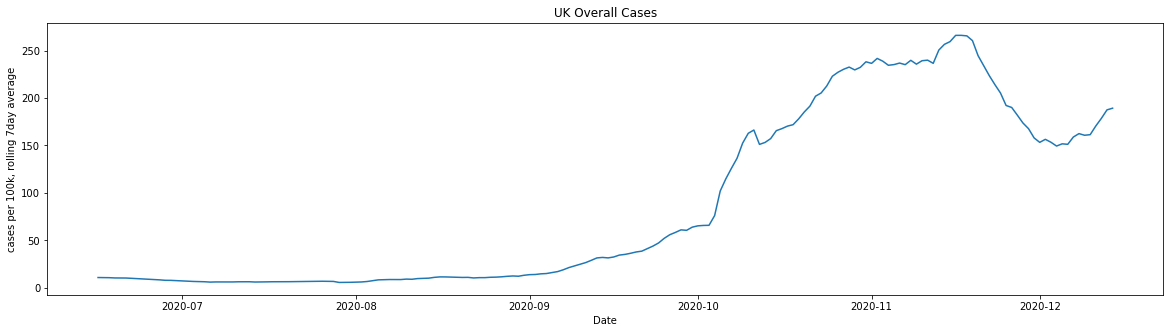

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.plot(ecdc_gbl_case_death_2020_uk_df[ecdc_gbl_case_death_2020_uk_df["dateRep"] > TIER_INTRO_DATE]["dateRep"], 
        ecdc_gbl_case_death_2020_uk_df[ecdc_gbl_case_death_2020_uk_df["dateRep"] > TIER_INTRO_DATE]["cases_per_100k"])
ax.set_ylabel("cases per 100k, rolling 7day average")
ax.set_xlabel("Date")
ax.set_title("UK Overall Cases")
plt.show()